In [1]:
pacman::p_load("tidyverse", "ggpubr", 'car', 'broom')

In [17]:
df <- read_table2("STAT501_Lesson01/coolhearts.tsv")
df$inf <- df$`Inf`
head(df)

Parsed with column specification:
cols(
  `Inf` = col_double(),
  Area = col_double(),
  Group = col_double(),
  X2 = col_double(),
  X3 = col_double()
)



Inf,Area,Group,X2,X3,inf
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.119,0.34,3,0,0,0.119
0.190,0.64,3,0,0,0.190
0.395,0.76,3,0,0,0.395
0.469,0.83,3,0,0,0.469
0.130,0.73,3,0,0,0.130
0.311,0.82,3,0,0,0.311


In [18]:
dim(df)

[1] 32  6

In [20]:
mlm.fll <- lm(inf ~ Area + X2 + X3, data=df)
summary(mlm.fll)


Call:
lm(formula = inf ~ Area + X2 + X3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29410 -0.06511 -0.01329  0.07855  0.35949 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.13454    0.10402  -1.293 0.206459    
Area         0.61265    0.10705   5.723 3.87e-06 ***
X2          -0.24348    0.06229  -3.909 0.000536 ***
X3          -0.06566    0.06507  -1.009 0.321602    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1395 on 28 degrees of freedom
Multiple R-squared:  0.6377,	Adjusted R-squared:  0.5989 
F-statistic: 16.43 on 3 and 28 DF,  p-value: 2.363e-06


## Tesing all slopes parameters is = 0

$H_{0}: \beta_{1} = \beta_{2} = \beta_{3} = 0$  
$Ha$: At  least one  $\beta_{i} \neq 0$   (for  i=1,2,3)  
F* 16.43, p-value = 2.363e-06
Pvalue is very small!

In [21]:
sst <- sum((df$inf - mean(df$inf))^2)
sst

[1] 1.504182

In [22]:
round(anova(mlm.fll),2)
## SSE = 0.54
## SST = 1.50
## SSR = 0.96 = SST - SSE

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,0.62,0.62,32.11,0.00
X2,1,0.31,0.31,16.16,0.00
X3,1,0.02,0.02,1.02,0.32
Residuals,28,0.54,0.02,NA,NA


In [24]:
(0.96/3) / (0.54/28) 

[1] 16.59259

In [6]:
round(Anova(mlm.fll, type=3),2)
## SST = 0.64 + 0.3 + 0.02 = 0.96

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.03,1,1.67,0.21
Area,0.64,1,32.75,0.00
X2,0.30,1,15.28,0.00
X3,0.02,1,1.02,0.32
Residuals,0.54,28,NA,NA


## Tesing one slope parameter is = 0

$H_{0}: \beta_{1} = 0$    
$H_{A}: \beta_{1} \neq 0$  
F* 32.75, p-value = 0.00  
Pvalue is very small!

In [7]:
mlm.r <- lm(`Inf` ~ X2 + X3, data=df)
summary(mlm.r)


Call:
lm(formula = `Inf` ~ X2 + X3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32027 -0.11764 -0.01895  0.07040  0.50473 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.40460    0.06385   6.337 6.35e-07 ***
X2          -0.16996    0.08822  -1.927   0.0639 .  
X3           0.06467    0.08822   0.733   0.4694    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2019 on 29 degrees of freedom
Multiple R-squared:  0.214,	Adjusted R-squared:  0.1598 
F-statistic: 3.947 on 2 and 29 DF,  p-value: 0.03047


In [8]:
round(anova(mlm.r),3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X2,1,0.300,0.300,7.357,0.011
X3,1,0.022,0.022,0.537,0.469
Residuals,29,1.182,0.041,NA,NA


In [9]:
round(anova(mlm.r, mlm.fll),3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,1.182,NA,NA,NA,NA
2,28,0.545,1,0.637,32.754,0


In [10]:
## SSE(R) -> sum(yi - mean(Y)^2 ). Here this is SST.
## SSE(F) -> sum(residuals ^2). Here this is just SSE
## Therefore, SST - SSE(F) = SSR
sse.r <- sum( (df$`Inf` - mean(df$`Inf`))^2 )
sse.r

sse.f = 0.54

[1] 1.504182

In [11]:
slm.ar <- lm(`Inf` ~ Area, data=df)
round(anova(slm.ar),2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,0.62,0.62,21.32,0
Residuals,30,0.88,0.03,NA,NA


In [12]:
round(anova(mlm.fll),2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,0.62,0.62,32.11,0.00
X2,1,0.31,0.31,16.16,0.00
X3,1,0.02,0.02,1.02,0.32
Residuals,28,0.54,0.02,NA,NA


In [13]:
round(anova(slm.ar, mlm.fll),4)

## 1st row RSS for slm Residuals Sum Sq
## 2nd row RSS for mlm.full Residuals Sum Sq

## Partial F-test
## H0: b2 = b3 = 0
## MSR(x2, x3|x1)/MSE(x1,x2,x3) F* is 8.59

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,0.8793,NA,NA,NA,NA
2,28,0.5449,2,0.3343,8.5902,0.0012


### Testing a subset of slope parameters is 0

$H_{0}: \beta_{2}=\beta_{3}=0$  
$H_{A}$: At least one $\beta_{j} \neq$ (for j=2,3)  

In [14]:
round(anova(slm.ar),3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,0.625,0.625,21.322,0
Residuals,30,0.879,0.029,NA,NA


In [15]:
round(anova(mlm.fll),3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,0.625,0.625,32.112,0.000
X2,1,0.315,0.315,16.162,0.000
X3,1,0.020,0.020,1.018,0.322
Residuals,28,0.545,0.019,NA,NA


In [27]:
## SSR(X2,X3|X1) = 0.314 + 0.019 = 0.334
## SSE(X1,X2,X3) = 0.5449
## SSR(X2,X3|X1)/2 /SSE(X1,X2,X3)/n-4
## F*=8.59

In [25]:
anova(slm.ar, mlm.fll)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,0.8792573,NA,NA,NA,NA
2,28,0.5449095,2,0.3343478,8.590176,0.001232872


## Example

In [25]:

df <- read_table2("STAT501_Lesson01/sugarbeets_new.txt")
head(df)

Parsed with column specification:
cols(
  Yield = col_double(),
  Nit = col_double(),
  Treat = col_double()
)



Yield,Nit,Treat
<dbl>,<dbl>,<dbl>
210,100,1
150,50,1
225,105,1
180,75,1
190,80,1
220,110,1


In [26]:
summary(df)

     Yield            Nit             Treat  
 Min.   :150.0   Min.   : 50.00   Min.   :1  
 1st Qu.:170.0   1st Qu.: 66.25   1st Qu.:1  
 Median :190.0   Median : 82.50   Median :2  
 Mean   :190.5   Mean   : 81.83   Mean   :2  
 3rd Qu.:213.8   3rd Qu.:100.00   3rd Qu.:3  
 Max.   :225.0   Max.   :110.00   Max.   :3  

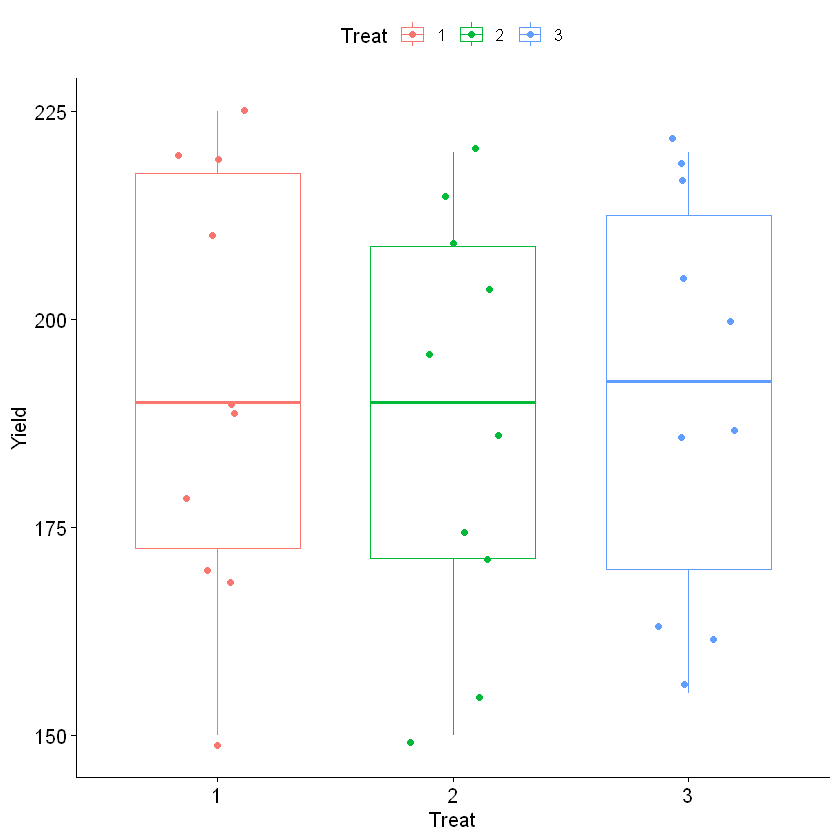

In [27]:
ggboxplot(df, x='Treat', y="Yield", add='jitter', col='Treat')

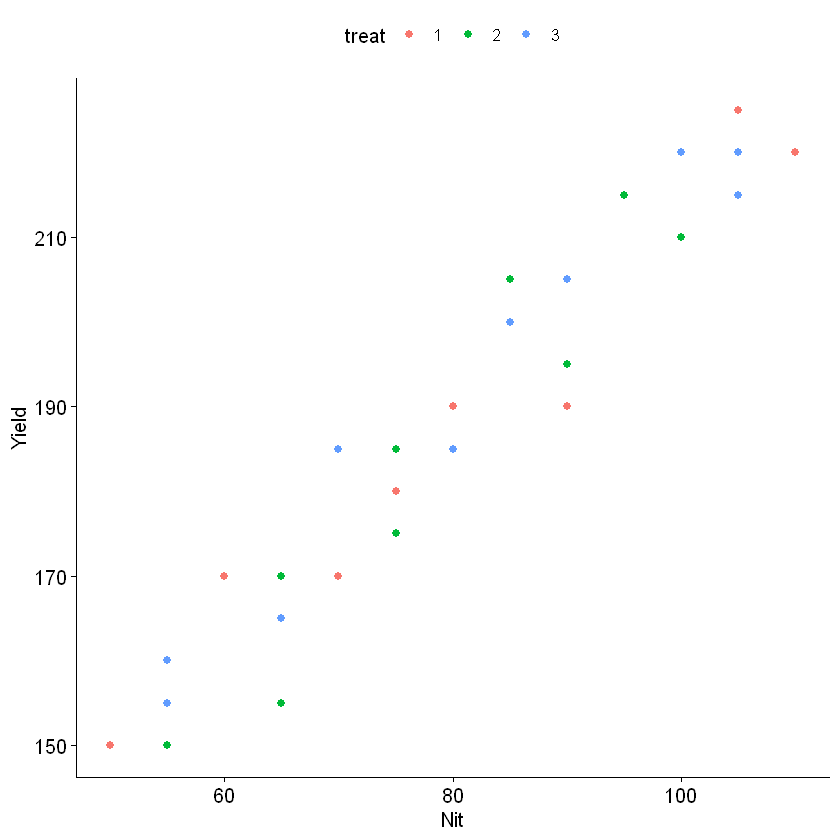

In [30]:
df$treat <- as.factor(df$Treat)
ggscatter(df, x="Nit", y="Yield", col='treat')

### 6.7 - Further Example

In [2]:
peru.df <- read_table2("STAT501_Lesson01/peru.txt")
head(peru.df)

Parsed with column specification:
cols(
  Age = col_double(),
  Years = col_double(),
  FracLife = col_double(),
  Weight = col_double(),
  Height = col_double(),
  Chin = col_double(),
  Forearm = col_double(),
  Calf = col_double(),
  Pulse = col_double(),
  Systol = col_double(),
  Diastol = col_double()
)



Age,Years,FracLife,Weight,Height,Chin,Forearm,Calf,Pulse,Systol,Diastol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,1,0.04761905,71.0,1629,8.0,7.0,12.7,88,170,76
22,6,0.27272727,56.5,1569,3.3,5.0,8.0,64,120,60
24,5,0.20833333,56.0,1561,3.3,1.3,4.3,68,125,75
24,1,0.04166667,61.0,1619,3.7,3.0,4.3,52,148,120
25,1,0.04000000,65.0,1566,9.0,12.7,20.7,72,140,78
27,19,0.70370370,62.0,1639,3.0,3.3,5.7,72,106,72


In [3]:
summary(peru.df)

      Age            Years          FracLife           Weight     
 Min.   :21.00   Min.   : 1.00   Min.   :0.02128   Min.   :53.00  
 1st Qu.:32.50   1st Qu.: 8.00   1st Qu.:0.22739   1st Qu.:57.00  
 Median :38.00   Median :13.00   Median :0.39394   Median :62.50  
 Mean   :36.54   Mean   :14.74   Mean   :0.38633   Mean   :63.16  
 3rd Qu.:41.50   3rd Qu.:19.00   3rd Qu.:0.52637   3rd Qu.:68.00  
 Max.   :54.00   Max.   :43.00   Max.   :0.89286   Max.   :87.00  
     Height          Chin           Forearm            Calf       
 Min.   :1473   Min.   : 3.000   Min.   : 1.300   Min.   : 0.000  
 1st Qu.:1537   1st Qu.: 3.300   1st Qu.: 3.300   1st Qu.: 5.700  
 Median :1572   Median : 5.300   Median : 5.000   Median : 7.700  
 Mean   :1579   Mean   : 5.849   Mean   : 5.067   Mean   : 8.251  
 3rd Qu.:1627   3rd Qu.: 7.650   3rd Qu.: 5.850   3rd Qu.:11.300  
 Max.   :1653   Max.   :12.000   Max.   :12.700   Max.   :20.700  
     Pulse           Systol         Diastol      
 Min.   :52.

In [4]:
mlm.fll <- lm(Systol ~ . -Diastol,data=peru.df)
summary(mlm.fll)


Call:
lm(formula = Systol ~ . - Diastol, data = peru.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3442  -6.3972   0.0507   5.7292  14.5257 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  146.81907   48.97096   2.998 0.005526 ** 
Age           -1.12144    0.32741  -3.425 0.001855 ** 
Years          2.45538    0.81458   3.014 0.005306 ** 
FracLife    -115.29395   30.16900  -3.822 0.000648 ***
Weight         1.41393    0.43097   3.281 0.002697 ** 
Height        -0.03464    0.03686  -0.940 0.355194    
Chin          -0.94369    0.74097  -1.274 0.212923    
Forearm       -1.17085    1.19329  -0.981 0.334612    
Calf          -0.15867    0.53716  -0.295 0.769810    
Pulse          0.11455    0.17043   0.672 0.506818    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.655 on 29 degrees of freedom
Multiple R-squared:  0.6674,	Adjusted R-squared:  0.5641 
F-statistic: 6.465 on 9 and 29 DF,  

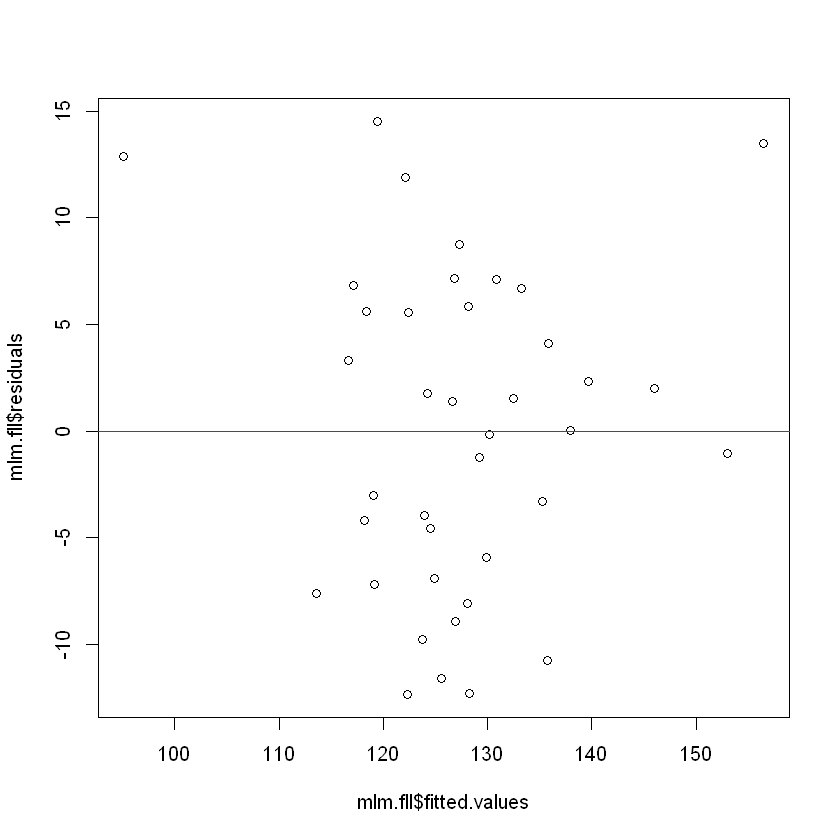

In [17]:
plot(mlm.fll$residuals ~ mlm.fll$fitted.values)
abline(h=0, col='red')

In [5]:
round(anova(mlm.fll),2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,0.22,0.22,0.00,0.96
Years,1,82.55,82.55,1.10,0.30
FracLife,1,3112.41,3112.41,41.54,0.00
Weight,1,706.54,706.54,9.43,0.00
Height,1,1.68,1.68,0.02,0.88
Chin,1,297.68,297.68,3.97,0.06
Forearm,1,113.91,113.91,1.52,0.23
Calf,1,10.01,10.01,0.13,0.72
Pulse,1,33.84,33.84,0.45,0.51


In [6]:
round(Anova(mlm.fll, type = 3),2)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),673.39,1,8.99,0.01
Age,878.90,1,11.73,0.00
Years,680.69,1,9.09,0.01
FracLife,1094.13,1,14.60,0.00
Weight,806.37,1,10.76,0.00
Height,66.14,1,0.88,0.36
Chin,121.52,1,1.62,0.21
Forearm,72.13,1,0.96,0.33
Calf,6.54,1,0.09,0.77


### Partial F-test

$H_{0}$ : $\beta_{5} = \beta_{6} = \beta_{7} =\beta_{8} = \beta_{9}$  
$H_{A}$ : at least one of $\beta_{5},\beta_{6},\beta_{7},\beta_{8},\beta_{9} \neq 0$

Height, Chin, Forearm, Calf and Pulse are removed.

In [8]:
mlm.rd <- lm(Systol ~ Age + Years + FracLife + Weight ,data=peru.df)
summary(mlm.rd)


Call:
lm(formula = Systol ~ Age + Years + FracLife + Weight, data = peru.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.890  -5.976   0.058   5.407  16.835 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  116.8354    21.9797   5.316 6.69e-06 ***
Age           -0.9507     0.3164  -3.004 0.004971 ** 
Years          2.3393     0.7714   3.032 0.004621 ** 
FracLife    -108.0728    28.3302  -3.815 0.000549 ***
Weight         0.8324     0.2754   3.022 0.004742 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.795 on 34 degrees of freedom
Multiple R-squared:  0.5974,	Adjusted R-squared:   0.55 
F-statistic: 12.61 on 4 and 34 DF,  p-value: 2.142e-06


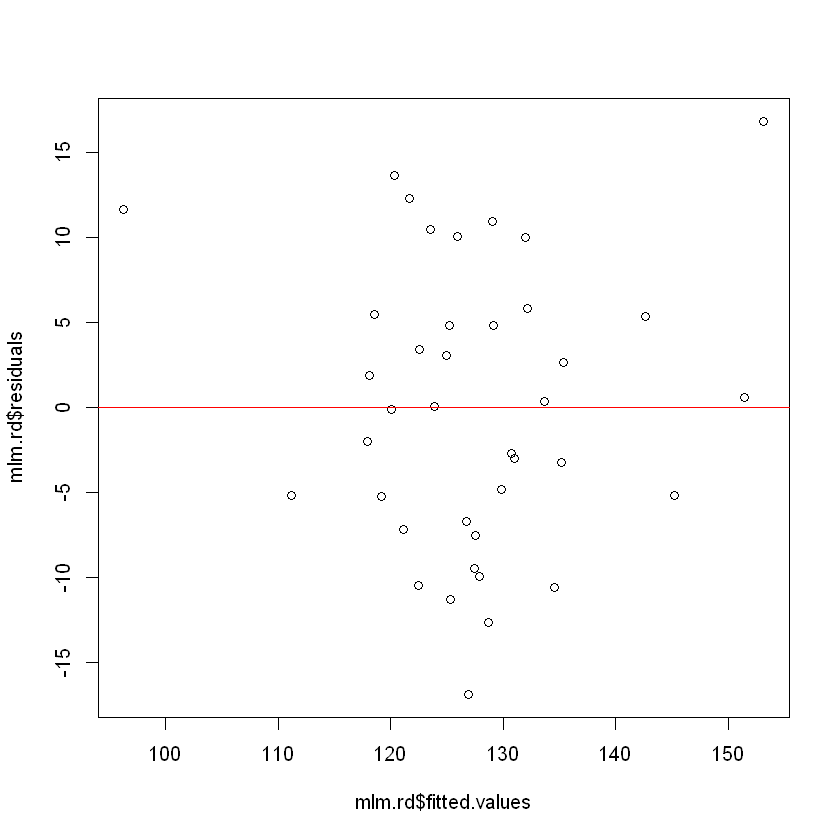

In [18]:
plot(mlm.rd$residuals ~ mlm.rd$fitted.values)
abline(h=0, col='red')

In [9]:
round(Anova(mlm.rd, type=3),2)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2185.42,1,28.26,0
Age,698.07,1,9.03,0
Years,711.20,1,9.20,0
FracLife,1125.55,1,14.55,0
Weight,706.54,1,9.14,0
Residuals,2629.71,34,NA,NA


In [11]:
anova(mlm.rd, mlm.fll)

### F score is 1.22 df is 5 and pvalue is 0.32 so those beta5 ~ beta9 is not useful for out regression model.

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,34,2629.708,NA,NA,NA,NA
2,29,2172.584,5,457.1238,1.220352,0.3247295


## Example 6-5


In [12]:
df <- read_table2("STAT501_Lesson01/Physical.txt")
head(df)

Parsed with column specification:
cols(
  Obs = col_double(),
  Sex = col_character(),
  Height = col_double(),
  LeftArm = col_double(),
  RtArm = col_double(),
  LeftFoot = col_double(),
  RtFoot = col_double(),
  LeftHand = col_double(),
  RtHand = col_double(),
  HeadCirc = col_double(),
  nose = col_double()
)



Obs,Sex,Height,LeftArm,RtArm,LeftFoot,RtFoot,LeftHand,RtHand,HeadCirc,nose
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Male,69,25.5,25.5,27.0,26.5,9.50,9.00,58.5,5.5
2,Male,79,28.0,25.0,29.0,27.5,9.00,9.00,54.0,5.0
3,Male,75,27.0,27.5,31.0,32.0,3.75,3.75,62.5,5.0
4,Male,69,25.0,25.5,25.5,25.5,10.00,8.00,58.5,5.5
5,Male,65,25.0,25.0,23.5,23.0,9.50,9.40,57.0,4.4
6,Male,79,30.5,30.5,28.0,28.0,8.50,8.50,58.5,4.5


In [14]:
mlm.1.4 <- lm(Height ~ LeftArm + LeftFoot + HeadCirc + nose, data=df)
summary(mlm.1.4)


Call:
lm(formula = Height ~ LeftArm + LeftFoot + HeadCirc + nose, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0660 -1.1850 -0.1569  1.2539  5.5071 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.50265    7.83031   2.363   0.0221 *  
LeftArm      0.80205    0.17074   4.697 2.09e-05 ***
LeftFoot     0.99730    0.16230   6.145 1.30e-07 ***
HeadCirc     0.08052    0.14952   0.539   0.5926    
nose        -0.14740    0.49233  -0.299   0.7659    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.183 on 50 degrees of freedom
Multiple R-squared:  0.774,	Adjusted R-squared:  0.7559 
F-statistic: 42.81 on 4 and 50 DF,  p-value: 1.447e-15


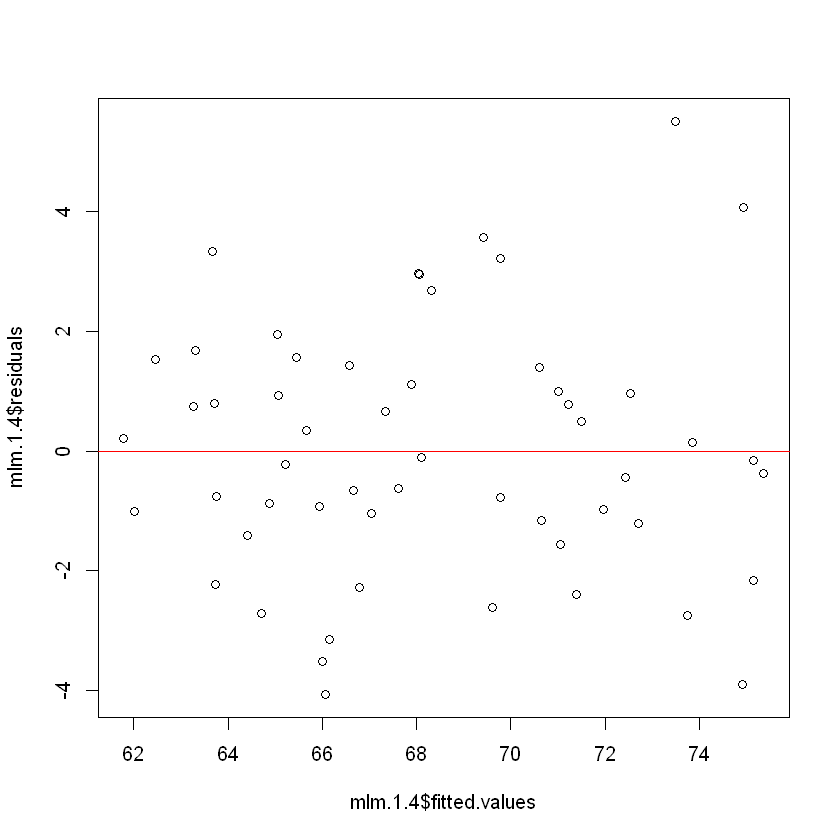

In [19]:
plot(mlm.1.4$residuals ~ mlm.1.4$fitted.values)
abline(h=0, col='red')

### Perform the general linear F-test
$H_{0}$ : $\beta_{3} = \beta_{4} = 0$  
$H_{A}$ : at least one of ($\beta_{3},\beta_{4}) \neq 0$  

In [21]:
round(anova(mlm.1.4), 3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LeftArm,1,590.214,590.214,123.811,0.000
LeftFoot,1,224.349,224.349,47.062,0.000
HeadCirc,1,1.402,1.402,0.294,0.590
nose,1,0.427,0.427,0.090,0.766
Residuals,50,238.354,4.767,NA,NA


In [22]:
round(Anova(mlm.1.4, type=3), 3)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),26.617,1,5.584,0.022
LeftArm,105.188,1,22.066,0.000
LeftFoot,180.001,1,37.759,0.000
HeadCirc,1.383,1,0.290,0.593
nose,0.427,1,0.090,0.766
Residuals,238.354,50,NA,NA


In [24]:
mlm.1.2 <- lm(Height ~ LeftArm + LeftFoot, data=df)
summary(mlm.1.2)


Call:
lm(formula = Height ~ LeftArm + LeftFoot, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.075 -1.179 -0.099  1.248  5.196 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.8572     3.5840   6.098 1.35e-07 ***
LeftArm       0.7958     0.1652   4.816 1.31e-05 ***
LeftFoot      1.0229     0.1468   6.969 5.54e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.149 on 52 degrees of freedom
Multiple R-squared:  0.7723,	Adjusted R-squared:  0.7635 
F-statistic: 88.18 on 2 and 52 DF,  p-value: < 2.2e-16


In [25]:
round(anova(mlm.1.2),2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LeftArm,1,590.21,590.21,127.78,0
LeftFoot,1,224.35,224.35,48.57,0
Residuals,52,240.18,4.62,NA,NA


In [28]:
round(anova(mlm.1.2, mlm.1.4),2)
## F score's df (2,50) = 0.19

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,52,240.18,NA,NA,NA,NA
2,50,238.35,2,1.83,0.19,0.83


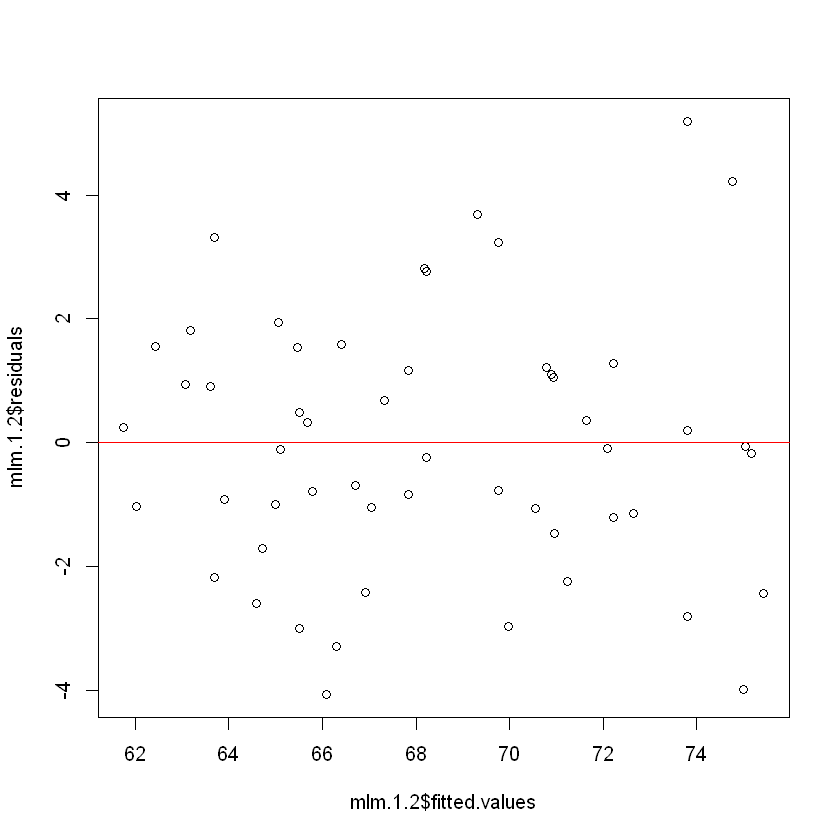

In [29]:
plot(mlm.1.2$residuals ~ mlm.1.2$fitted.values)
abline(h=0, col='red')

In [30]:
slm <- lm(Height ~ LeftArm, data=df)


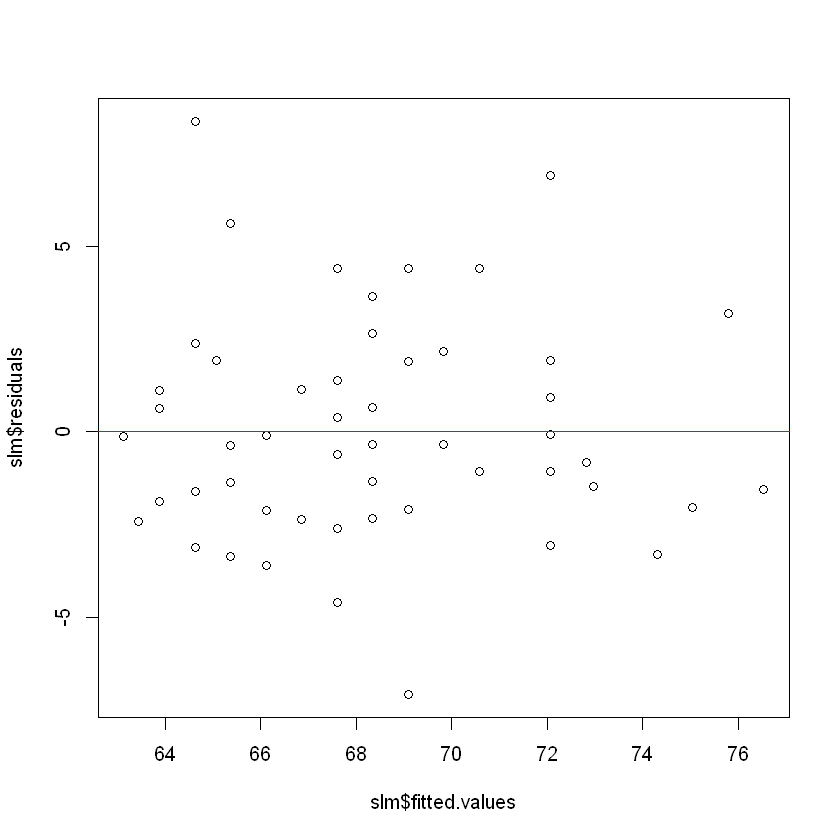

In [31]:
plot(slm$residuals ~ slm$fitted.values)
abline(h=0, col='red')

## R Help 6: MLR Model Evaluation

In [40]:
allentest <- read.table("STAT501_Lesson01/allentest.txt", header=T)
attach(allentest)

head(allentest)

The following object is masked from package:carData:

    Vocab




,Subj,ACL,Vocab,Abstract,SDMT
,<int>,<dbl>,<int>,<int>,<int>
1,1,6.0,28,36,70
2,2,5.4,34,32,49
3,3,4.7,19,8,28
4,4,4.8,32,28,47
5,5,4.9,22,4,29
6,6,4.5,24,24,23


In [41]:
sum((ACL-mean(ACL))^2) ## SST

[1] 43.04957

In [43]:
model.1 <- lm(ACL ~ Vocab)
round(anova(model.1),2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Vocab,1,2.69,2.69,4.47,0.04
Residuals,67,40.36,0.60,NA,NA


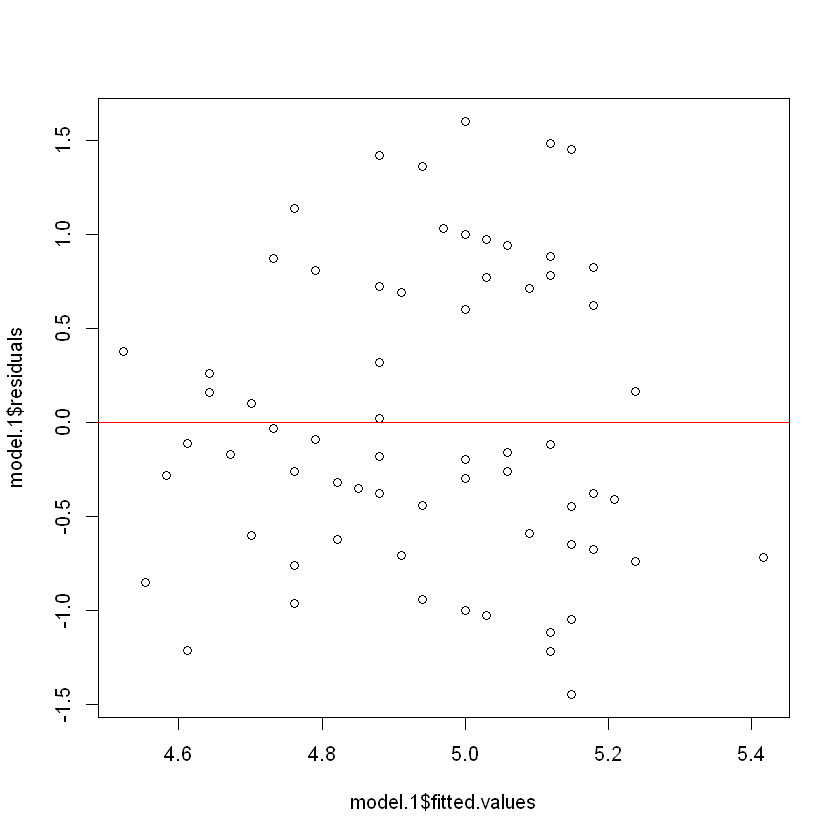

In [45]:
plot(model.1$residuals ~ model.1$fitted.values)
abline(h=0, col='red')

In [50]:
model.13 <- lm(ACL ~ Vocab + SDMT)
round(anova(model.13),2)

## SSR(Vocab, SDMT) = 2.69 + 9.09 = 11.77

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Vocab,1,2.69,2.69,5.68,0.02
SDMT,1,9.09,9.09,19.18,0.00
Residuals,66,31.27,0.47,NA,NA


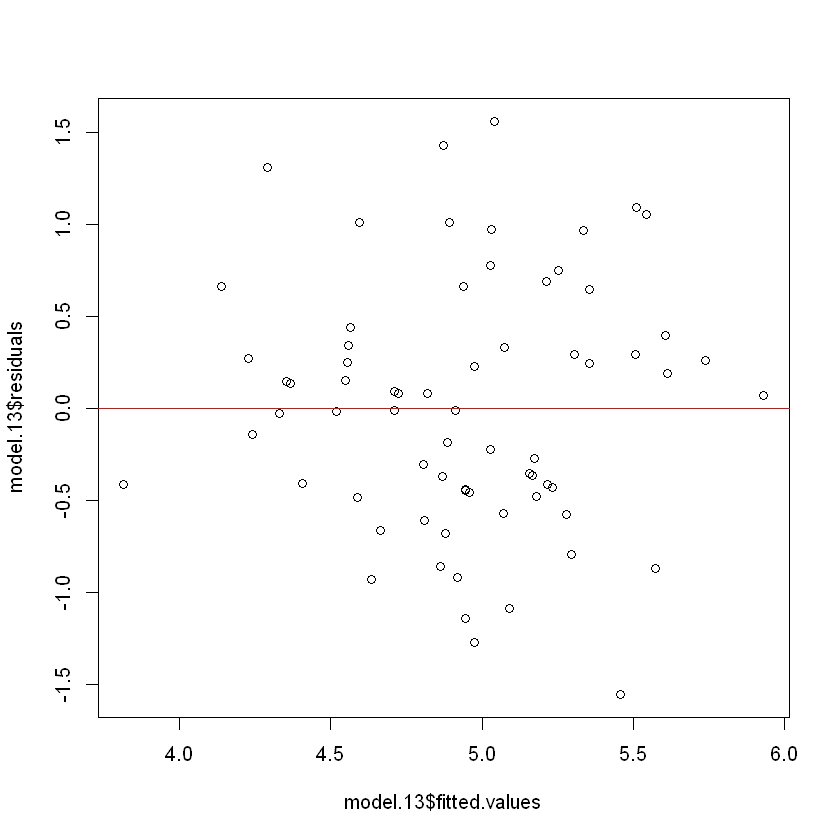

In [49]:
plot(model.13$residuals ~ model.13$fitted.values)
abline(h=0, col='red')

In [51]:
model.3 <- lm(ACL ~ SDMT)
round(anova(model.3),3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SDMT,1,11.68,11.680,24.946,0
Residuals,67,31.37,0.468,NA,NA


In [55]:
model.31 <- lm(ACL ~ SDMT + Vocab)
round(anova(model.31),2)

## SSR(Vocab, SDMT) = 11.6799 + 0.0979 = 11.7778

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SDMT,1,11.68,11.68,24.65,0.00
Vocab,1,0.10,0.10,0.21,0.65
Residuals,66,31.27,0.47,NA,NA


In [54]:
round(Anova(model.13, tpye=3),2)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Vocab,0.10,1,0.21,0.65
SDMT,9.09,1,19.18,0.00
Residuals,31.27,66,NA,NA


In [58]:
model.312 <- lm(ACL ~ SDMT + Vocab + Abstract)
round(anova(model.312),2)

## SSR(Vocab, Abstract | SDMT) = 0.1 + 0.52 = 0.62

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SDMT,1,11.68,11.68,24.69,0.00
Vocab,1,0.10,0.10,0.21,0.65
Abstract,1,0.52,0.52,1.11,0.30
Residuals,65,30.75,0.47,NA,NA


In [59]:
round(Anova(model.312,type=3),2)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),64.46,1,136.26,0.00
SDMT,6.91,1,14.61,0.00
Vocab,0.44,1,0.93,0.34
Abstract,0.52,1,1.11,0.30
Residuals,30.75,65,NA,NA
